In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

In [33]:
df= pd.read_csv("survey lung cancer.csv")
df_copy= df.copy()

In [34]:
# check for NaN values 
print(df.isna().sum())
print(" ")

# one-hot encoding gender and labels

print("unique gender tags before",df['GENDER'].unique())
df.replace({'M':0, 'F':1}, inplace=True )
print("unique gender tags after",df['GENDER'].unique())

print("unique labels", df['LUNG_CANCER'].unique())
df.replace({'YES':1,'NO':0}, inplace=True)
print("unique labels", df['LUNG_CANCER'].unique())




GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
 
unique gender tags before ['M' 'F']
unique gender tags after [0 1]
unique labels ['YES' 'NO']
unique labels [1 0]


In [36]:
# Imbalance in Data sets
df['GENDER']= df['GENDER'].astype(int)
df['LUNG_CANCER']= df['LUNG_CANCER'].astype(int)
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

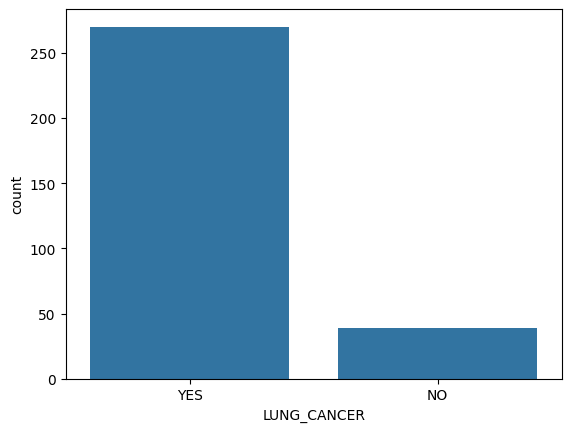

In [41]:
# Data exploration
X_lab= df.drop(columns='LUNG_CANCER')
Y_lab= df['LUNG_CANCER']
sns.countplot(x= df_copy['LUNG_CANCER'], data= df_copy)


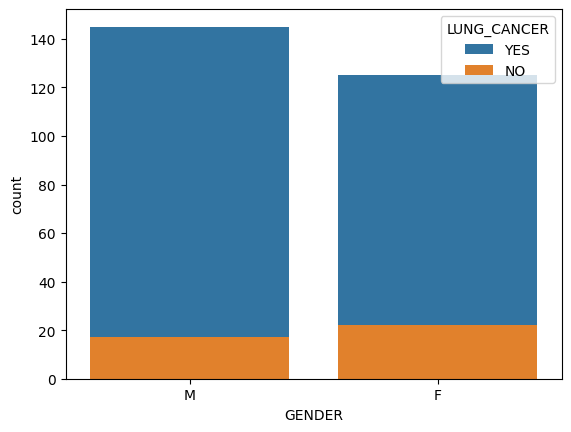

GENDER


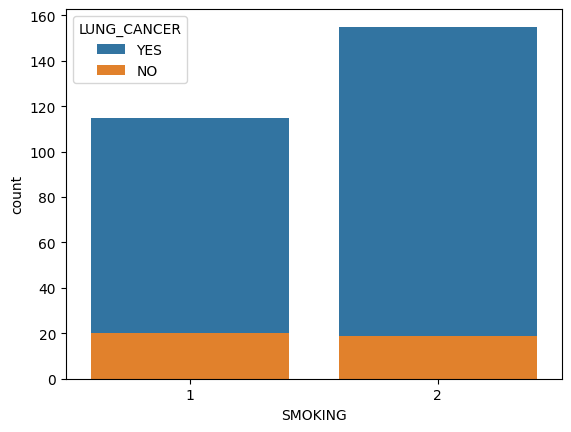

SMOKING


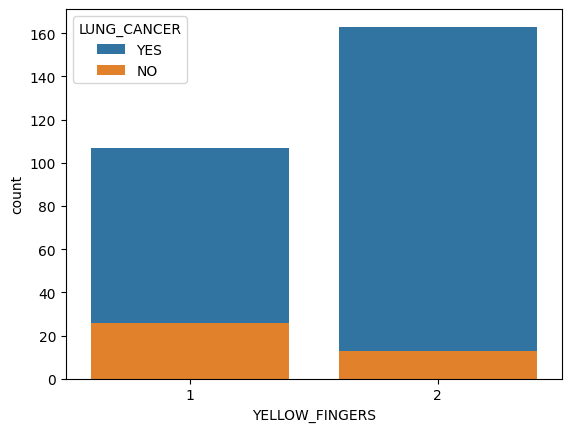

YELLOW_FINGERS


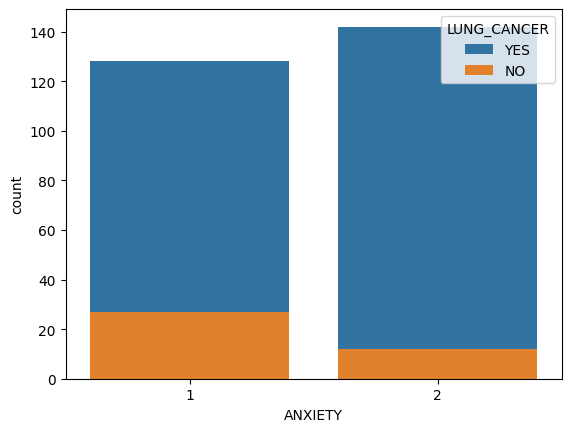

ANXIETY


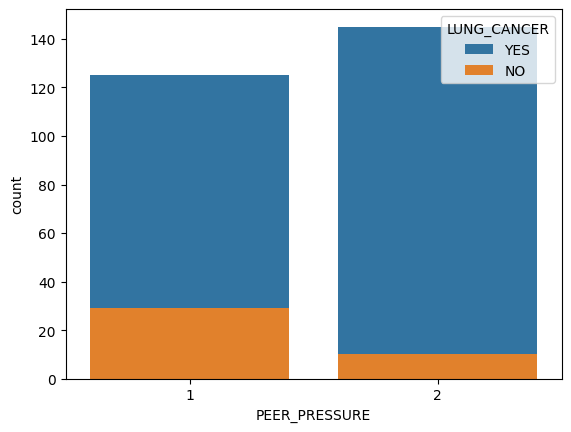

PEER_PRESSURE


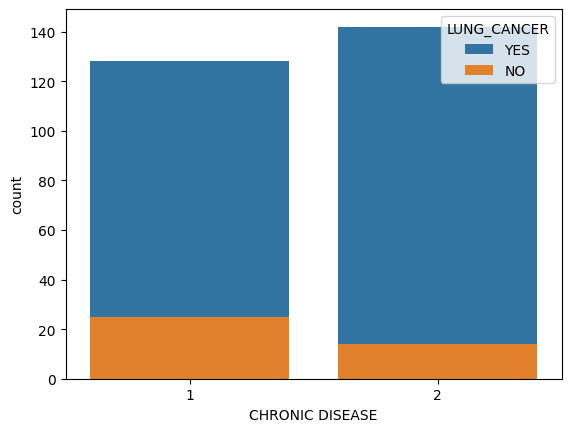

CHRONIC DISEASE


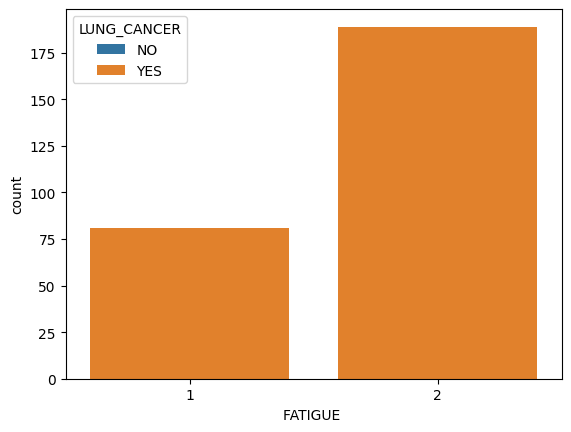

FATIGUE 


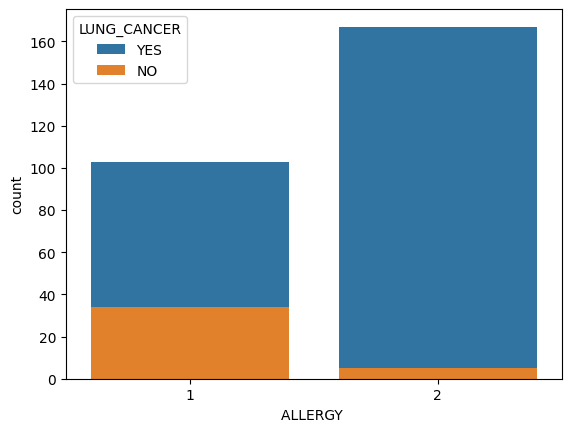

ALLERGY 


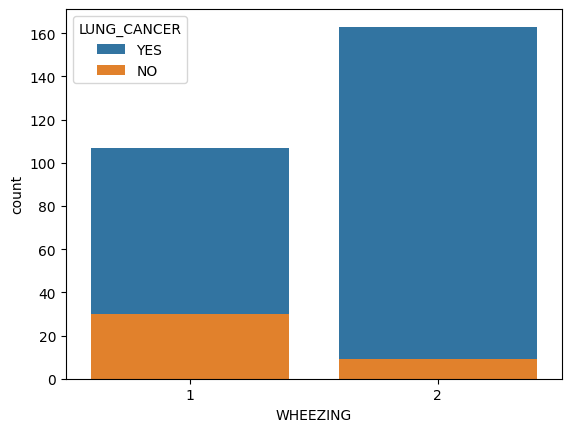

WHEEZING


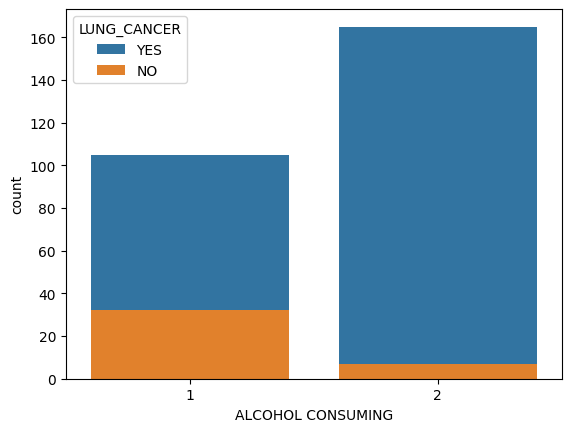

ALCOHOL CONSUMING


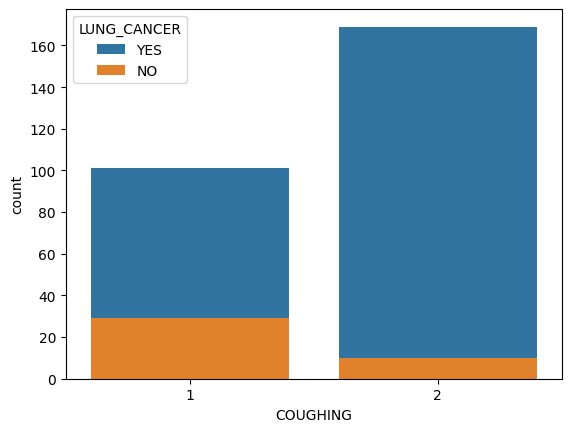

COUGHING


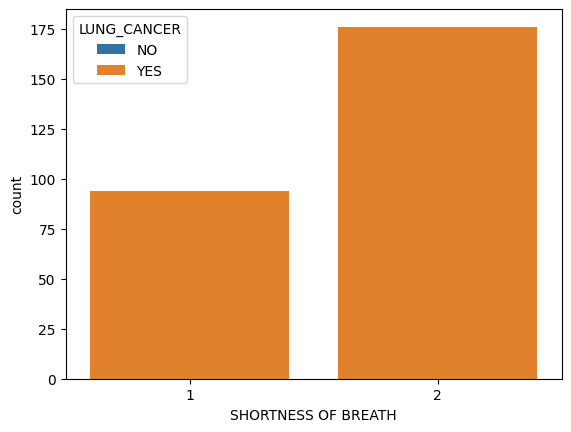

SHORTNESS OF BREATH


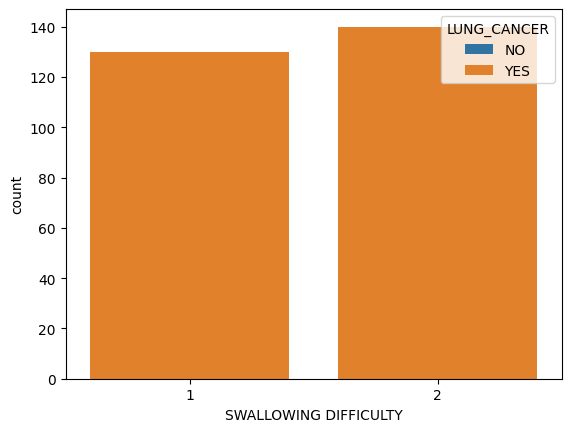

SWALLOWING DIFFICULTY


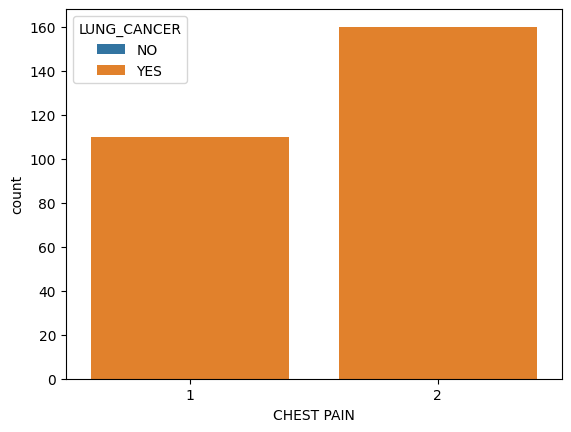

CHEST PAIN


In [38]:
# Data exploration
list_arr= df_copy.drop(columns="AGE")
list_col= list_arr.columns
for i in range(0, len(list_arr.columns)-1):
    sns.countplot(x= f'{list_col[i]}', data= list_arr, hue='LUNG_CANCER', dodge=False )
    plt.show()
    print(list_col[i])


<Axes: xlabel='AGE', ylabel='Count'>

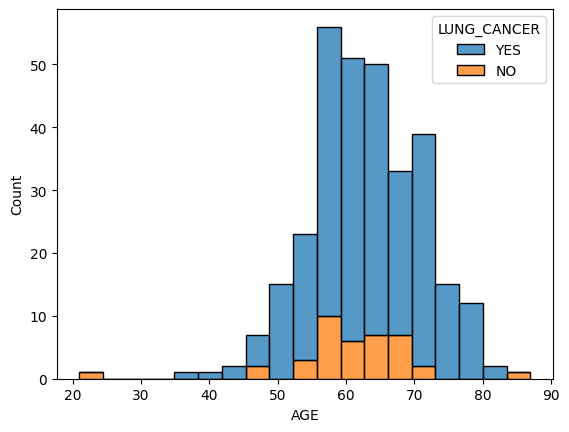

In [39]:
# Age distribution wrt outcome
sns.histplot(x= df_copy['AGE'], hue= df_copy['LUNG_CANCER'], multiple='stack')

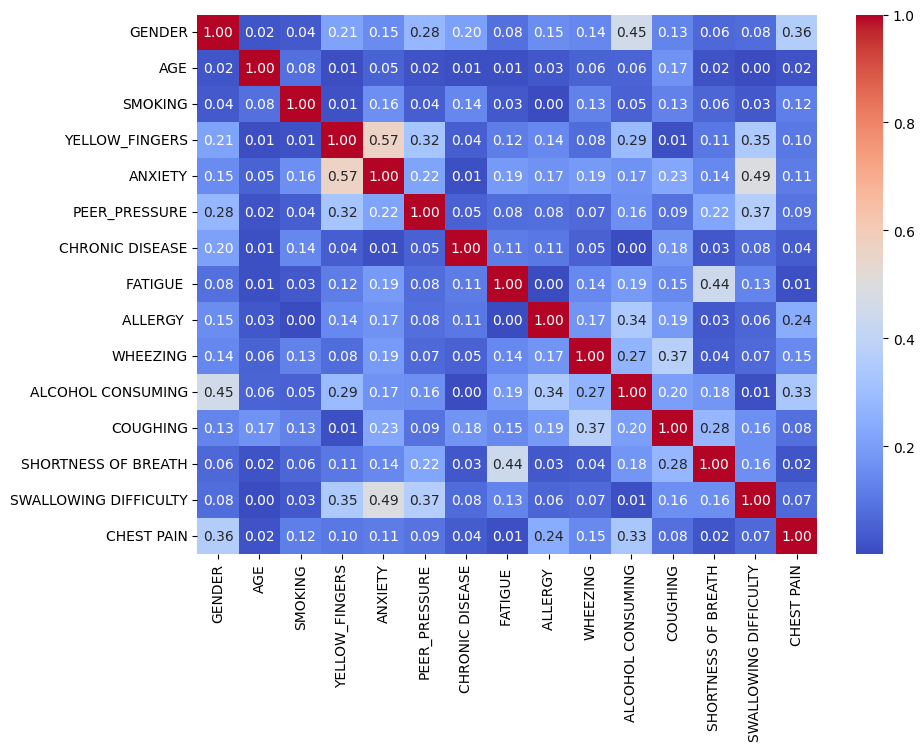

In [ ]:
# correlation map
plt.figure(figsize=[10,7])
sns.heatmap(X_lab.corr().abs(), annot=True,fmt=".2f",cmap='coolwarm')

# Dropping features with >0.5 correlation
df.drop(columns='ANXIETY', inplace=True)

In [52]:
df.to_csv("Processed_data.csv", index=False)
